In [1]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from IPython.display import Markdown, display,HTML,Image
from z3 import *

### Hooks #2

The grid below can be partitioned into 9 L-shaped “hooks”. The largest is 9-by-9
(contains 17 squares), the next largest is 8-by-8 (contains 15 squares), and so
on. The smallest hook is just a single square.
Find where the hooks are located, and place nine 9’s in the largest hook, eight
8’s in the next-largest, etc., down to one 1 in the smallest hook.
The goal is for the sum of the numbers in each row and column to match the
number given outside the grid.
As your answer to this puzzle, submit the largest product one can achieve using
a subset of the numbered squares in the completed grid, satisfying the condition
that no two squares in the subset are in the same row or column.

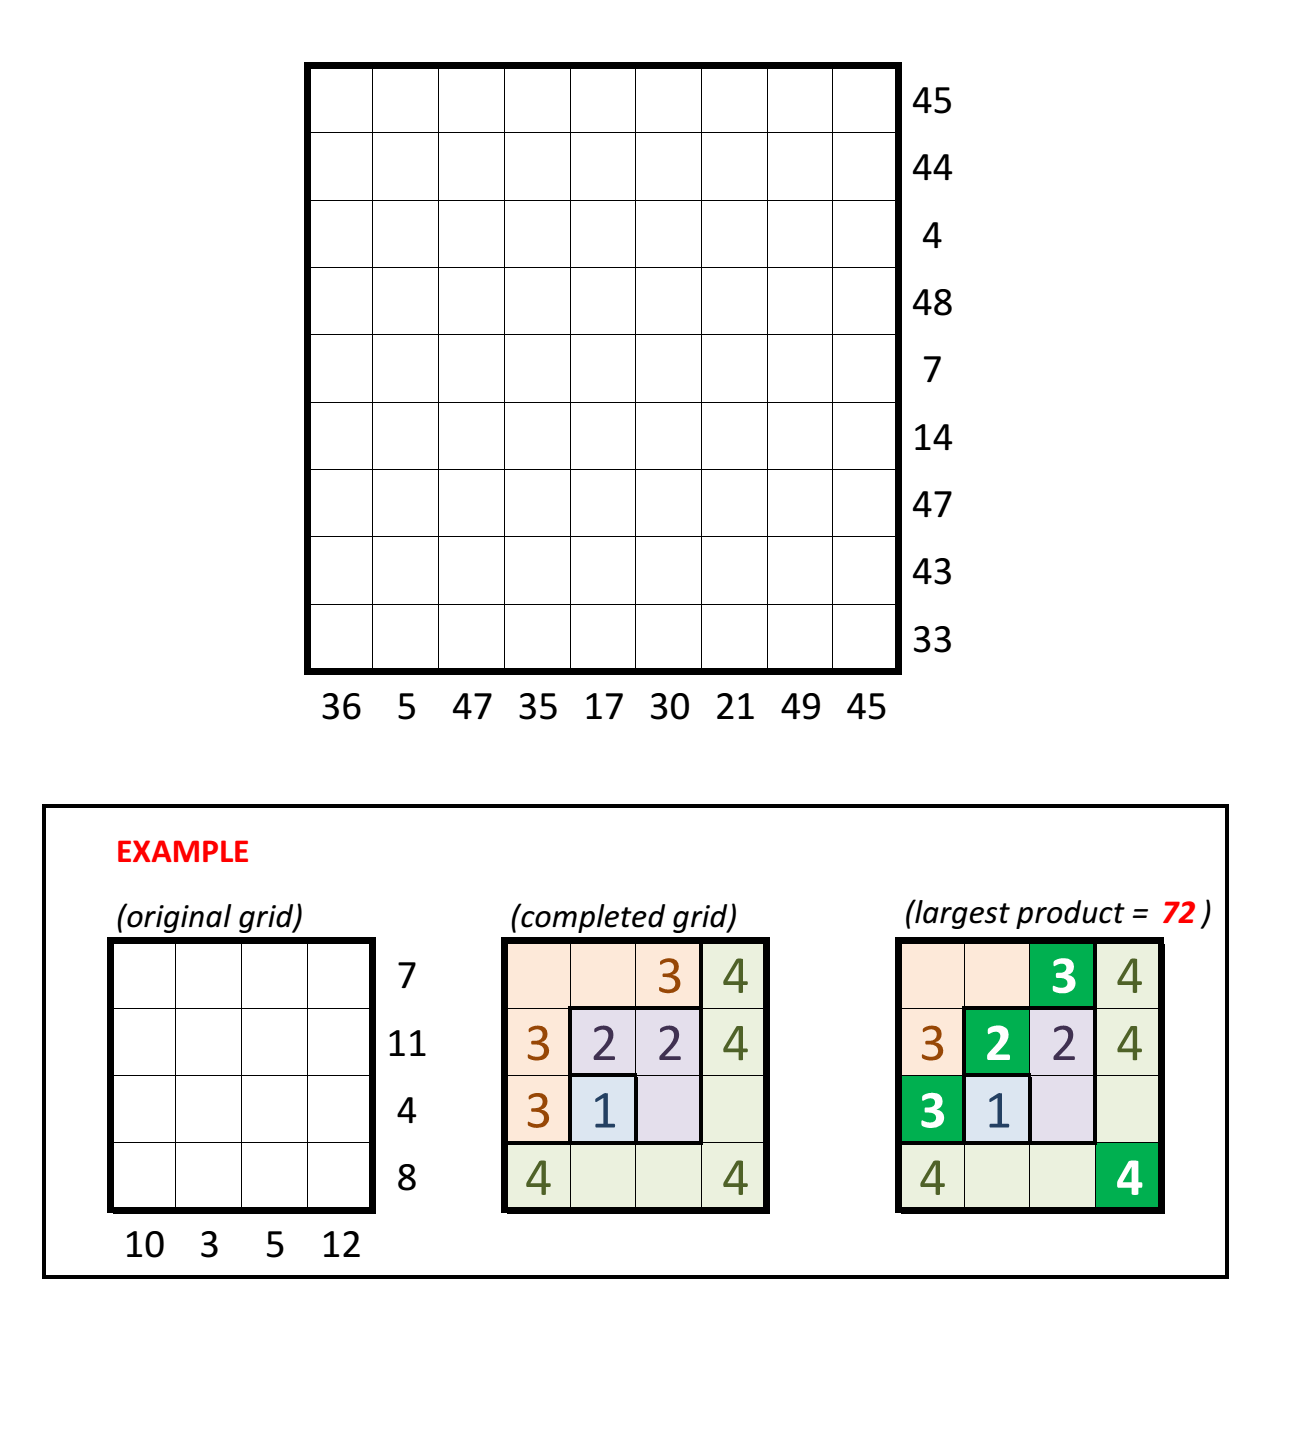

In [2]:
url='https://www.janestreet.com/puzzles/hooks-2-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[11:15]))))
display(Image('https://www.janestreet.com/puzzles/may16_puzzle_expanded.png',width=400))

In [3]:
#Setup the constraints
row_labels = [45,44,4, 48, 7, 14, 47, 43, 33]
col_labels = [36, 5, 47, 35, 17, 30, 21,49, 45]

def sol_print(solved,matrix):
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    x = np.array((solved*matrix).astype('int').astype('str'))
    x[x=="0"] =""
    ax =sns.heatmap(solved,annot=x,cbar=False,cmap="tab10",fmt="",linewidths=2,linecolor='k',xticklabels=col_labels, yticklabels=row_labels,
                     annot_kws={"fontsize":12,"color":"k"},alpha=.6)
    ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
    plt.xticks(rotation=0,fontsize =14)
    plt.yticks(rotation=0,fontsize =14)
    plt.tight_layout()
    plt.show()
    
def neigh(x,y,N):
    return [(i+x,j+y) for i,j in [(-1,0),(0,-1),(1,0),(0,1)] if i+x >=0 and i+x <N and j+y >=0 and j+y <N]


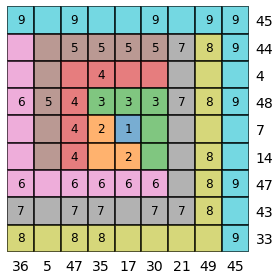

Took 2.6900 seconds
Solution is 17,418,240


In [4]:
start = time.time()
N =9
#set up the solver and variables.
s = Tactic("qffd").solver()

# H== hooks
H = np.array(IntVector("h",N**2),dtype=object).reshape((N,N))

row_fix =IntVector("r",N)
col_fix =IntVector("c",N)

s += [And(e>0,e<=N) for (i,j),e in np.ndenumerate(H)]
s += [And(e>=0,e<N) for e in row_fix+col_fix]

s += Distinct(row_fix)
s += Distinct(col_fix)

for n in range(1,N+1):
    s+=PbEq([(e==n,1) for _,e in np.ndenumerate(H)],2*n-1)
    if n!=1:
        s+=PbEq([(If(e==int(n),Sum([H[k,l] ==int(n) for k,l in neigh(i,j,N)]),0)==1,1) for (i,j),e in np.ndenumerate(H)],2)
        
for n in range(N):
    s += [Implies(e == int(n+1),Or(i == row_fix[n],j == col_fix[n])) for (i,j),e in np.ndenumerate(H)]
    
# Y = filled    
Y = np.array(IntVector("y",N**2),dtype=object).reshape((N,N))
s += [Or(e==0,e==1) for (i,j),e in np.ndenumerate(Y)]

for n in range(1,N+1):
    s+=PbEq([(And(e==n,Y[i,j]==1),1) for (i,j),e in np.ndenumerate(H)],n)

#totals
for n in range(9):
   s += Sum([H[i,j]*e for (i,j),e in np.ndenumerate(Y) if i==n])==int(row_labels[n])
   s += Sum([H[i,j]*e for (i,j),e in np.ndenumerate(Y) if j==n])==int(col_labels[n])
        
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    result_x =  evalu(H)
    result_y =  evalu(Y)
    sol_print(result_x,result_y)
    print("Took {:.4f} seconds".format(time.time()- start))
    soln = result_x*result_y
    
    max = 0
    for n in itertools.permutations(range(N)):
        tot = np.product([soln[i,n[i]] for i in range(N) if soln[i,n[i]] !=0])
        if tot > max:
            max = tot
    print("Solution is {:,.0f}".format(max))
else:
    print("Fail")

### Hooks #2

Show Puzzle
The unique configuration that completes the grid is shown here, and the largest
possible product of squares in a valid subset is
17,418,240

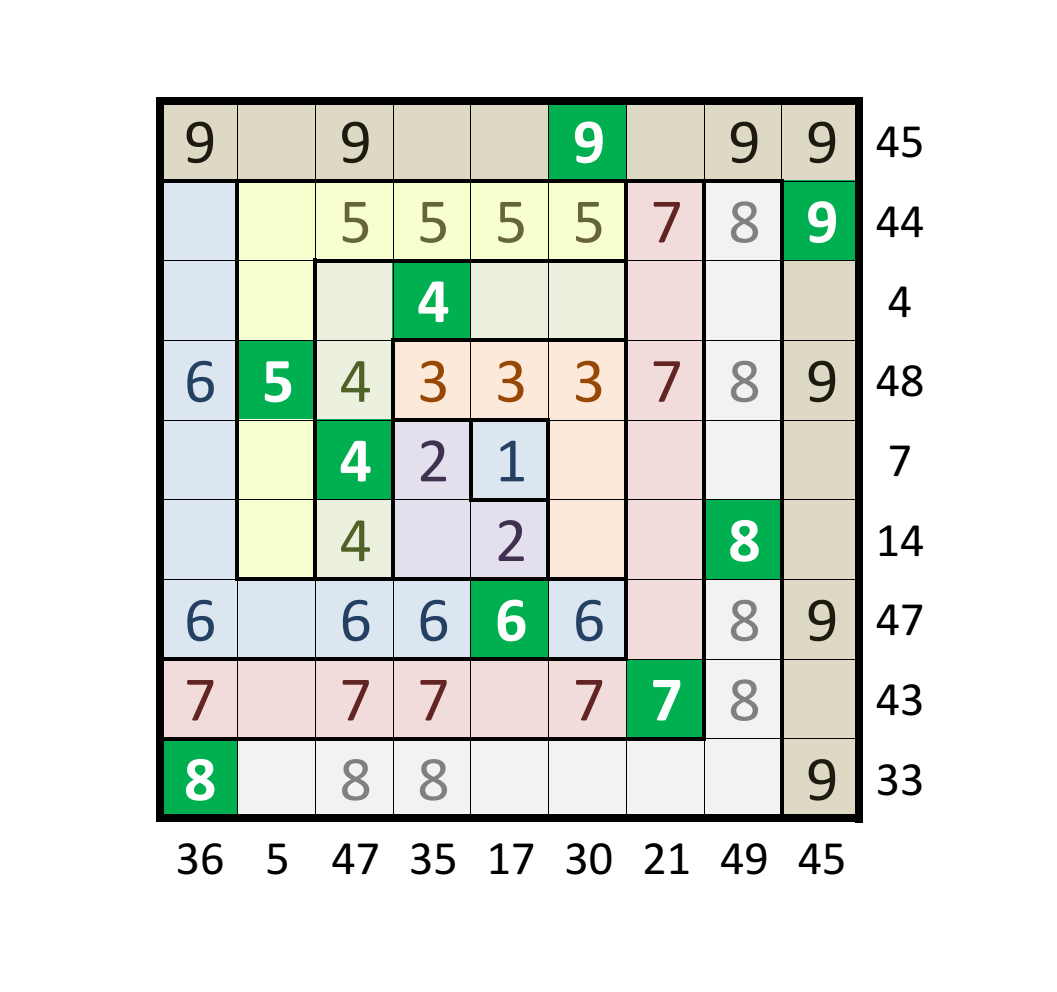

In [5]:
url='https://www.janestreet.com/puzzles/hooks-2-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[10:13]))))
display(Image('https://www.janestreet.com/puzzles/may16_solution.png',width=400))